In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/job-placement-dataset/job_placement.csv


> **EDA's goal is to explore the correlation of salaries.**

# **Import Libraries & Read Dataset**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_name = '/kaggle/input/job-placement-dataset/job_placement.csv'
data = pd.read_csv(file_name)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   700 non-null    int64  
 1   name                 700 non-null    object 
 2   gender               700 non-null    object 
 3   age                  700 non-null    int64  
 4   degree               700 non-null    object 
 5   stream               700 non-null    object 
 6   college_name         700 non-null    object 
 7   placement_status     700 non-null    object 
 8   salary               700 non-null    int64  
 9   gpa                  700 non-null    float64
 10  years_of_experience  699 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 60.3+ KB


In [5]:
data.head()

,id,name,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,John Doe,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,2,Jane Smith,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,3,Michael Johnson,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,4,Emily Davis,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,5,David Brown,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [6]:
data['degree'].unique()

array(["Bachelor's"], dtype=object)

In [7]:
data['placement_status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

'ID' and 'name' are unrelated to salary and there is only one type of 'degree', so they will be excluded from the data.

# **Data Preprocessing**

In [8]:
data_pre = data.dropna()
data_pre = data_pre[data_pre['placement_status'] == 'Placed']

# If 'placement_status' is 'Not Placed', the salary is 0 so no need.

In [9]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 0 to 698
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   569 non-null    int64  
 1   name                 569 non-null    object 
 2   gender               569 non-null    object 
 3   age                  569 non-null    int64  
 4   degree               569 non-null    object 
 5   stream               569 non-null    object 
 6   college_name         569 non-null    object 
 7   placement_status     569 non-null    object 
 8   salary               569 non-null    int64  
 9   gpa                  569 non-null    float64
 10  years_of_experience  569 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 53.3+ KB


In [10]:
data_pre = data_pre.drop(['name','id','degree'],axis=1)

In [11]:
data_pre.isna().sum()

gender                 0
age                    0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

# **Pivot table & Charts**

In [12]:
cols = data_pre.columns

for col in cols:
    globals()[col] = data_pre[col]
    
cols.drop('salary')

Index(['gender', 'age', 'stream', 'college_name', 'placement_status', 'gpa',
       'years_of_experience'],
      dtype='object')

In [13]:
pivot_gender = pd.pivot_table(data_pre, index='gender', values='salary',aggfunc='mean')
round(pivot_gender,2)

,salary
gender,
Female,64519.87
Male,64370.79


**Adjust the values because they are similar.**

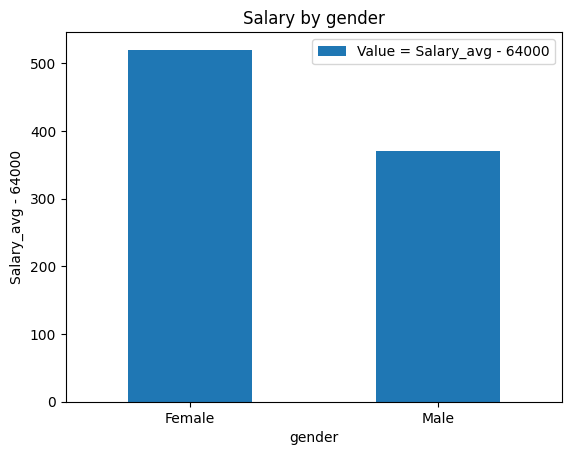

In [14]:
pivot_gender_z = pivot_gender - 64000

pivot_gender_z.plot(kind='bar')
plt.xlabel('gender')
plt.xticks(rotation = 0)
plt.ylabel('Salary_avg - 64000')
plt.title('Salary by gender')
plt.legend(['Value = Salary_avg - 64000'])
plt.show()

In [15]:
pivot_age = pd.pivot_table(data_pre, index=age,values='salary',aggfunc='mean')
round(pivot_age,2)

,salary
age,
23,64378.88
24,64622.75
25,64367.09
26,64382.72


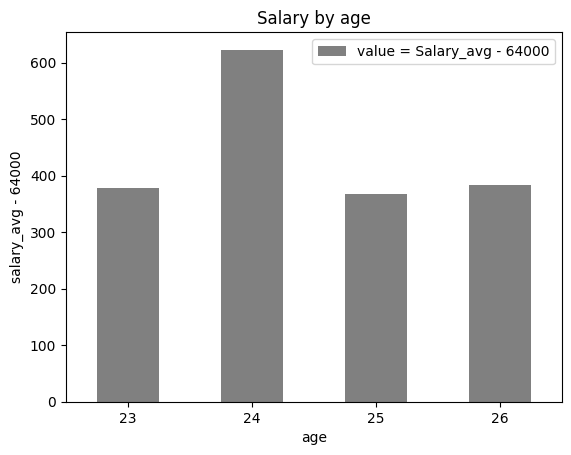

In [16]:
pivot_age_z = pivot_age-64000

pivot_age_z.plot(kind='bar', color = 'gray')
plt.xlabel('age')
plt.xticks(rotation = 0)
plt.ylabel('salary_avg - 64000')
plt.title('Salary by age')
plt.legend(['value = Salary_avg - 64000'])
plt.show()

In [17]:
pivot_stream = pd.pivot_table(data_pre, index = stream,values='salary',aggfunc='mean')
round(pivot_stream,2)

,salary
stream,
Computer Science,64279.50
Electrical Engineering,64144.44
Electronics and Communication,64831.68
Information Technology,64609.38
Mechanical Engineering,64404.49


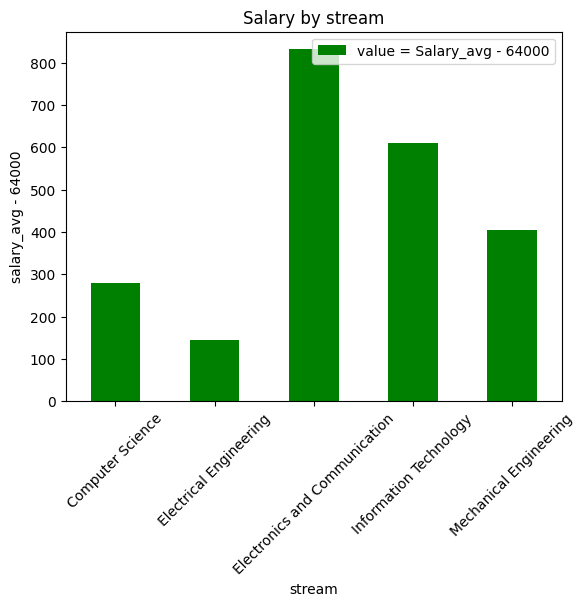

In [18]:
pivot_stream_z = pivot_stream-64000

pivot_stream_z.plot(kind='bar', color = 'green')
plt.xlabel('stream')
plt.xticks(rotation = 45)
plt.ylabel('salary_avg - 64000')
plt.title('Salary by stream')
plt.legend(['value = Salary_avg - 64000'])
plt.show()

In [19]:
pivot_college_name = pd.pivot_table(data_pre, index = college_name,values='salary',aggfunc='mean')
round(pivot_college_name,2)

,salary
college_name,
California Institute of Technology,59000.00
Columbia University,63000.00
Duke University,61000.00
Georgetown University,67000.00
Harvard University,60000.00
Massachusetts Institute of Technology,65000.00
Northwestern University,57000.00
Princeton University,62000.00
Rice University,65000.00


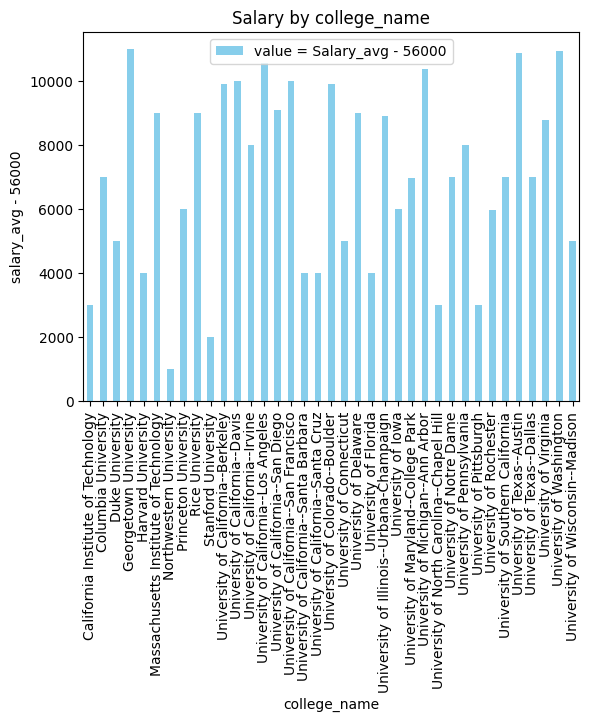

In [20]:
pivot_college_name_z = pivot_college_name - 56000

pivot_college_name_z.plot(kind='bar', color = 'skyblue')
plt.xlabel('college_name')
plt.ylabel('salary_avg - 56000')
plt.title('Salary by college_name')
plt.legend(['value = Salary_avg - 56000'])
plt.show()

In [21]:
pivot_gpa = pd.pivot_table(data_pre, index=gpa,values='salary',aggfunc='mean')
round(pivot_gpa,2)

,salary
gpa,
3.5,61297.30
3.6,63146.34
3.7,63651.16
3.8,65017.34
3.9,65883.56


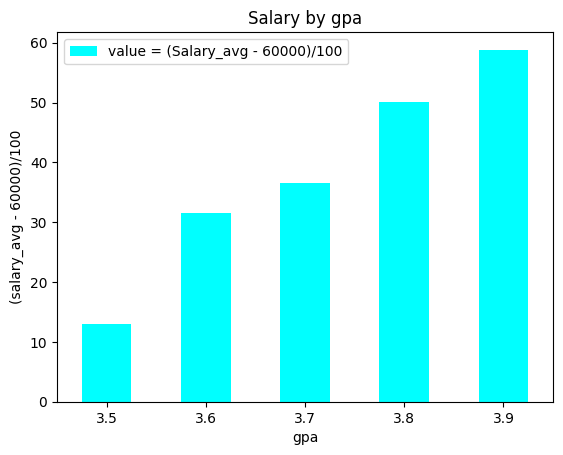

In [22]:
pivot_gpa_z = (pivot_gpa-60000)/100

pivot_gpa_z.plot(kind='bar', color = 'cyan')
plt.xlabel('gpa')
plt.xticks(rotation = 0)
plt.ylabel('(salary_avg - 60000)/100')
plt.title('Salary by gpa')
plt.legend(['value = (Salary_avg - 60000)/100'])
plt.show()

In [23]:
pivot_years_of_experience = pd.pivot_table(data_pre, index=years_of_experience,values='salary',aggfunc='mean')
round(pivot_years_of_experience,2)

,salary
years_of_experience,
1.0,63027.03
2.0,63389.83
3.0,65679.72


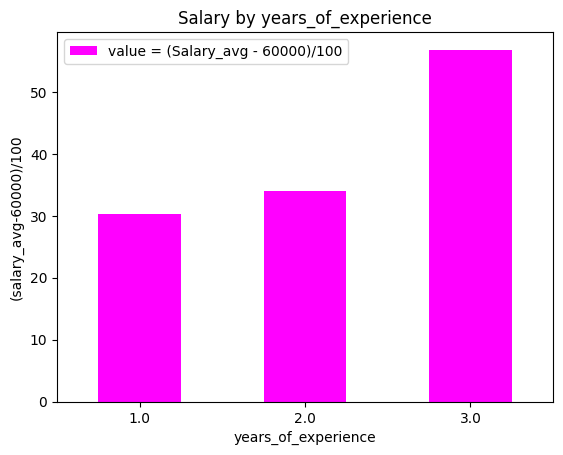

In [24]:
pivot_years_of_experience_z = (pivot_years_of_experience-60000)/100

pivot_years_of_experience_z.plot(kind='bar', color = 'magenta')
plt.xlabel('years_of_experience')
plt.xticks(rotation = 0)
plt.ylabel('(salary_avg-60000)/100')
plt.title('Salary by years_of_experience')
plt.legend(['value = (Salary_avg - 60000)/100'])
plt.show()

# **Analyzing**

On average, female have a higher salary then male, and 24-year-olds have the highest salary.



In [25]:
max_name = pivot_college_name.idxmax().iloc[0]
max_salary = pivot_college_name.max().max()
min_name = pivot_college_name.idxmin().iloc[0]
min_salary = pivot_college_name.min().min()

print("Top (college_name) :",max_name)
print("Top_salay (college_name) :",max_salary)
print("Bottom (college_name) :",min_name)
print("Bottom_salay (college_name) :",min_salary)

Top (college_name) : Georgetown University
Top_salay (college_name) : 67000.0
Bottom (college_name) : Northwestern University
Bottom_salay (college_name) : 57000.0


The rest, as expected, is proportional to 'years_of_experience' and 'gpa'.

# **Thanks**